# Worksheet 12

Name: Yuhan Peng<br>
UID: U25596256

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1.This is an example of classification. The output is categorical, the "class" attribute is the job offer status is a discrete value .<br>
2.This is not an example of classification, it's predicting a continuous or count value based on the GPA<br>
3.This is an example of classification. The number of stars (1-5) can be treated as the class attribute with discrete values. We are classifying the reviews into one of the five star categories.<br>
4.This is not an example of classification. It's more about predicting a count or continuous value rather than assigning a class label based on other attributes.It's an example of regression since the output is a continuous value (number of births, which could be any non-negative integer).<br>

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

know w hat constitutes a good feature, what constitutes a good set of features, capture the general trend / relationship between class
and features as simply as possible, splitting data to tranning set, validation set, test set. Processing the data, do modeling training,use the training set to train different models or algorithms. Use the validation set to tune hyperparameters. Do modeling evaluation. 

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting : model is simple but doesn't perform well on the training data.<br>
Overfitting : model becomes "too tailored" to the training data, capturing not just the genuine patterns but also the noise or random fluctuations in the data. While it might perform exceptionally well on the training data, it will likely perform poorly on new, unseen data because it's too specialized to the specific samples it was trained on.<br>

Signs to look out:

Underfitting: model is too simple and cannot create a relationship between the input and the output, high bias and low variance


Overfitting: Low error rates and a high variance. The model performs well on the training data but does not perform well on the evaluation data.


### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

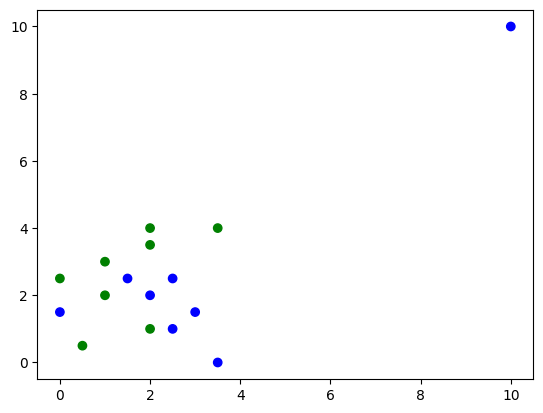

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

yes

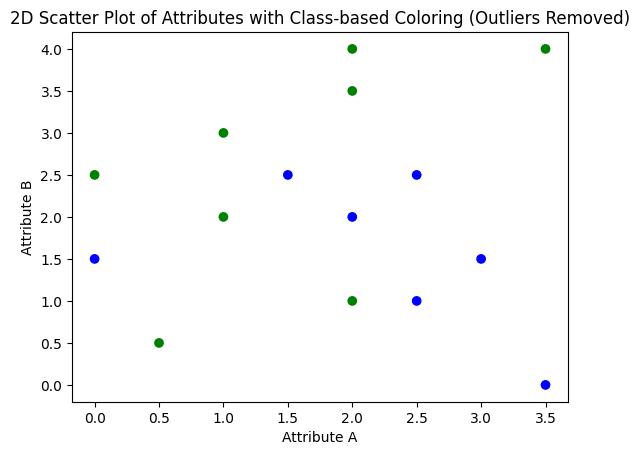

In [3]:
import numpy as np

def remove_outliers(attribute):
    Q1 = np.percentile(attribute, 25)
    Q3 = np.percentile(attribute, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a boolean array indicating which values are not outliers
    return (attribute >= lower_bound) & (attribute <= upper_bound)

# Determine non-outlier indices for both attributes
non_outliers_A = remove_outliers(np.array(data["Attribute A"]))
non_outliers_B = remove_outliers(np.array(data["Attribute B"]))

# Consider a point to be non-outlier only if it's non-outlier in both attributes
non_outliers = non_outliers_A & non_outliers_B

# Filter out outliers from the data
data["Attribute A"] = np.array(data["Attribute A"])[non_outliers].tolist()
data["Attribute B"] = np.array(data["Attribute B"])[non_outliers].tolist()
data["Class"] = np.array(data["Class"])[non_outliers].tolist()


colors = np.array([x for x in 'bgrcmyk'])

# Scatter plot
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("2D Scatter Plot of Attributes with Class-based Coloring (Outliers Removed)")
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Yes


For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

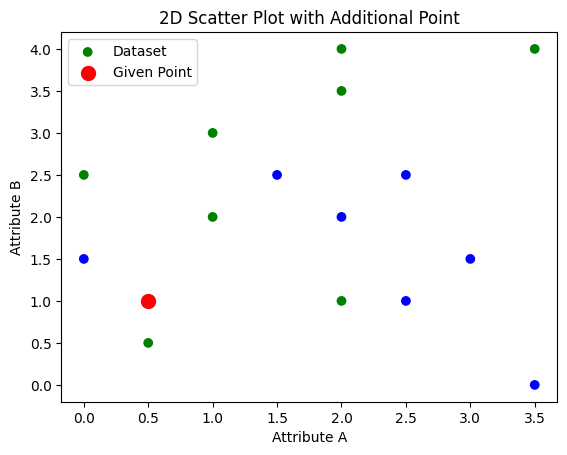

In [4]:
import matplotlib.pyplot as plt

# Existing dataset
attribute_A = data["Attribute A"]
attribute_B = data["Attribute B"]
colors = np.array([x for x in 'bgrcmyk'])

# Scatter plot for the dataset
plt.scatter(attribute_A, attribute_B, color=colors[data["Class"]].tolist(), label='Dataset')
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("2D Scatter Plot with Additional Point")

# Plotting the given point in red
plt.scatter(0.5, 1, color='r', label='Given Point', s=100)  # s=100 to make the point slightly larger

plt.legend()
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2):
    """Compute the Euclidean distance between two points."""
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


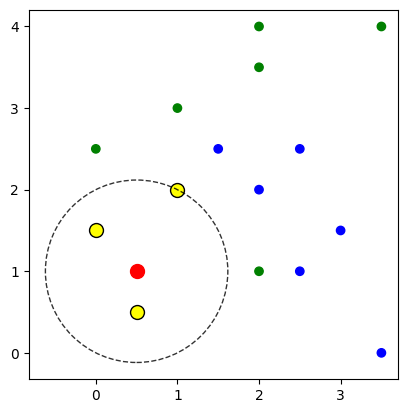

In [6]:
def n_closest_to(example, n):
    """
    Returns the indices of the n closest points to the example point from the dataset.
    """
    distances = [euclidean_distance(example, (x,y)) for x, y in zip(data["Attribute A"], data["Attribute B"])]
    return np.argsort(distances)[:n]

# Example point
example = (0.5, 1)

# Getting the indices of the 3 closest points
closest_indices = n_closest_to(example, 3)

# Extracting the coordinates of the 3 closest points
closest_points_x = np.array(data["Attribute A"])[closest_indices]
closest_points_y = np.array(data["Attribute B"])[closest_indices]

# Location of the example point
location = example

# Radius for the circle = distance to the 3rd closest point
radius = euclidean_distance(example, (closest_points_x[2], closest_points_y[2]))

# Plotting
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
axes.scatter(example[0], example[1], color='r', s=100)  # Given point in red
axes.scatter(closest_points_x, closest_points_y, color='yellow', s=100, edgecolors='black')  # 3 closest points in yellow

# Drawing the circle
cir = plt.Circle(location, radius, fill=False, alpha=0.8, linestyle='--')
axes.add_patch(cir)

axes.set_aspect('equal')  # necessary so that the circle is not oval
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [7]:
def majority(points):
    classes = np.array(data["Class"])[points]
    counts = np.bincount(classes)
    if len(counts) == 1:  # all three points belong to class 0
        return 0
    elif counts[0] >= 2:  # majority or tie (default to 0)
        return 0
    else:  # majority belongs to class 1
        return 1
assigned_class = majority(closest_indices)
print(f"The class assigned to the point {example} is: {assigned_class}")

The class assigned to the point (0.5, 1) is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [8]:
def n_closest_to_except_one(example, n, exception_index):
    """
    Returns the indices of the n closest points to the example point from the dataset, excluding a specific index.
    """
    distances = [euclidean_distance(example, (x,y)) if idx != exception_index else float('inf') for idx, (x, y) in enumerate(zip(data["Attribute A"], data["Attribute B"]))]
    return np.argsort(distances)[:n]

count = 0
for i in range(len(data["Attribute A"])):
    actual_class = data["Class"][i]
    
    # Extract the i-th point from the dataset to be considered as the test point
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    
    # Get the 3 closest points from the training set (excluding the current test point)
    closest_indices = n_closest_to_except_one(test_point, 3, i)
    
    # Predict the class of the test point based on the majority class of its 3 closest neighbors in the training set
    prediction = majority(closest_indices)
    
    if prediction == actual_class:
        count += 1

# Compute the overall accuracy
accuracy = count / len(data["Attribute A"])
print(f"Overall accuracy = {accuracy:.2f}")


Overall accuracy = 0.73
